# Phân tích dữ liệu YouTube theo tỉnh

Dữ liệu: `youtube_province_videos.csv` chứa thông tin video theo tỉnh, vùng, hashtag, tương tác (views, likes, comments).

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (12, 6)
sns.set_style('whitegrid')

In [36]:
# Load dữ liệu
DATA_PATH = 'youtube_province_videos.csv'
df = pd.read_csv(DATA_PATH)
print(f"✅ Đã tải {DATA_PATH} với {len(df)} dòng, {df.shape[1]} cột")
df.head()

✅ Đã tải youtube_province_videos.csv với 2999 dòng, 11 cột


,province,region,hashtag_query,video_id,title,channel_title,published_at,views,likes,comments,url
0,Hà Nội,ĐỒNG BẰNG SÔNG HỒNG,#hanoi,tQmIozp0D5g,Dự báo thời tiết Hà Nội hôm nay 17/12 | Hà Nội...,HTV - Đài Hà Nội,2025-12-16T23:30:21Z,1407,17,0,https://www.youtube.com/watch?v=tQmIozp0D5g
1,Hà Nội,ĐỒNG BẰNG SÔNG HỒNG,#hanoi,CSolf4tKhKY,"Dự báo thời tiết Hà Nội đêm nay, ngày mai 17/1...",HTV - Đài Hà Nội,2025-12-16T13:42:17Z,6491,37,0,https://www.youtube.com/watch?v=CSolf4tKhKY
2,Hà Nội,ĐỒNG BẰNG SÔNG HỒNG,#hanoi,3Eb3PnIdUKo,Hà Nội bắt đầu mở bán hàng trăm nhà ở xã hội v...,Thể Thao Văn Hóa,2025-12-17T03:32:29Z,49,1,1,https://www.youtube.com/watch?v=3Eb3PnIdUKo
3,Hà Nội,ĐỒNG BẰNG SÔNG HỒNG,#hanoi,bPsZk4guaJI,Bức xúc vụ tài xế xe buýt ở Hà Nội bị nhóm ngư...,Tạp chí VietTimes,2025-12-16T07:38:24Z,1892,10,0,https://www.youtube.com/watch?v=bPsZk4guaJI
4,Hà Nội,ĐỒNG BẰNG SÔNG HỒNG,#hanoi,z-aBp_Gw_HY,Vụ tài xế xe buýt bị hành hung ở Hà Nội: Tiết ...,Báo Sức khỏe & Đời sống,2025-12-16T22:01:08Z,7320,25,0,https://www.youtube.com/watch?v=z-aBp_Gw_HY


In [37]:
# Thông tin tổng quan
print("📋 Cột:", df.columns.tolist())
print("\n📌 Kiểu dữ liệu:")
print(df.dtypes)
print("\n🔍 Missing values:")
print(df.isnull().sum())

📋 Cột: ['province', 'region', 'hashtag_query', 'video_id', 'title', 'channel_title', 'published_at', 'views', 'likes', 'comments', 'url']

📌 Kiểu dữ liệu:
province         object
region           object
hashtag_query    object
video_id         object
title            object
channel_title    object
published_at     object
views             int64
likes             int64
comments          int64
url              object
dtype: object

🔍 Missing values:
province         0
region           0
hashtag_query    0
video_id         0
title            0
channel_title    0
published_at     0
views            0
likes            0
comments         0
url              0
dtype: int64


In [38]:
# Chuẩn hóa kiểu dữ liệu số
num_cols = ['views', 'likes', 'comments']
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

# Thống kê mô tả
print(df[num_cols].describe().round(2))

            views     likes  comments
count     2999.00   2999.00   2999.00
mean     34240.56    327.62     20.06
std     140391.18   1672.27    111.26
min          0.00      0.00      0.00
25%        781.00      4.00      0.00
50%       3744.00     23.00      0.00
75%      17737.00    136.00      6.00
max    3078237.00  43162.00   3922.00


In [39]:
# Top 10 video theo lượt xem
TopN = 10
top_views = df.nlargest(TopN, 'views')[['province', 'title', 'channel_title', 'views', 'likes', 'comments', 'url']]
print(top_views.to_string(index=False))

   province                                                                                                title               channel_title   views  likes  comments                                         url
  Quảng Trị 2 Ngày 1 Đêm Mùa 4|Tập 93:HIEUTHUHAI vào vai "phản diện" hù chú Sáu,dàn cast hoang mang giữa địa đạo ĐÔNG TÂY PROMOTION OFFICIAL 3078237  43162      3922 https://www.youtube.com/watch?v=I3s-EhKodhE
   Lạng Sơn        Rùng Rợn Vụ Án Nguyễn Xuân Đạt ở Lạng Sơn 🫣 #shortvideo #tintuc #tinnong24h #tinnong #short .                Hạnh 93 Vlog 1969975   8494       105 https://www.youtube.com/watch?v=Yt3FW71UEl0
    Đắk Lắk                                                           nhìn lại trận lũ lịch sử vừa qua ở Phú Yên              chú Tư Phú Yên 1809565  14543       717 https://www.youtube.com/watch?v=L7QxM1xHF5Q
   Tây Ninh                                                          Tuổi học trò bất ổn P8 | Lê Long An #shorts               Long An Daxua 1717807  21074     

In [40]:
# Top 10 video theo lượt thích
TopN = 10
top_likes = df.nlargest(TopN, 'likes')[['province', 'title', 'channel_title', 'views', 'likes', 'comments', 'url']]
print(top_likes.to_string(index=False))

       province                                                                                                title               channel_title   views  likes  comments                                         url
      Quảng Trị 2 Ngày 1 Đêm Mùa 4|Tập 93:HIEUTHUHAI vào vai "phản diện" hù chú Sáu,dàn cast hoang mang giữa địa đạo ĐÔNG TÂY PROMOTION OFFICIAL 3078237  43162      3922 https://www.youtube.com/watch?v=I3s-EhKodhE
      Ninh Bình                                     Hà Sam 24H Đi Du Lịch Các Tỉnh Thành Bằng Tất Cả Các Phương Tiện                      Hà Sam 1662711  39857      1797 https://www.youtube.com/watch?v=gOsvoNYzWb0
    Tuyên Quang                                     Hà Sam 24H Đi Du Lịch Các Tỉnh Thành Bằng Tất Cả Các Phương Tiện                      Hà Sam 1662711  39857      1797 https://www.youtube.com/watch?v=gOsvoNYzWb0
       Tây Ninh         Vụ lái xe Lexus ở Tây Ninh: Đáng thương hơn đáng trách?😥 #phapluat #giadinh #cuocsong #xahoi            Pháp Luật Xã Hội

📌 Tổng hợp theo tỉnh (sorted by views):
       province    views  likes  comments
        Đắk Lắk 10594935  74210      3384
      Ninh Bình  9260068 102639      9318
       Tây Ninh  6392797  78477      3411
      Quảng Trị  6087005  64179      4734
      Vĩnh Long  5728010  52397      3339
       Lạng Sơn  5727749  41955      1415
        Cần Thơ  5695286  50835      3859
TP. Hồ Chí Minh  5197356  58091      4517
    Tuyên Quang  4812522  73133      4639
        Đà Nẵng  4186548  15581       320
         Cà Mau  3240336  35969      2571
      Đồng Tháp  3088220  18106      1030
       An Giang  2992780  27878      1188
       Lâm Đồng  2701506  26378      1397
      Khánh Hoà  2688344  29699      1504
       Hưng Yên  2584075  17412      1009
       Đồng Nai  2323974  19001       642
        Gia Lai  2226559  20004      1106
      Hải Phòng  2180881  23106      3205
        Lào Cai  1940918  32090      1025


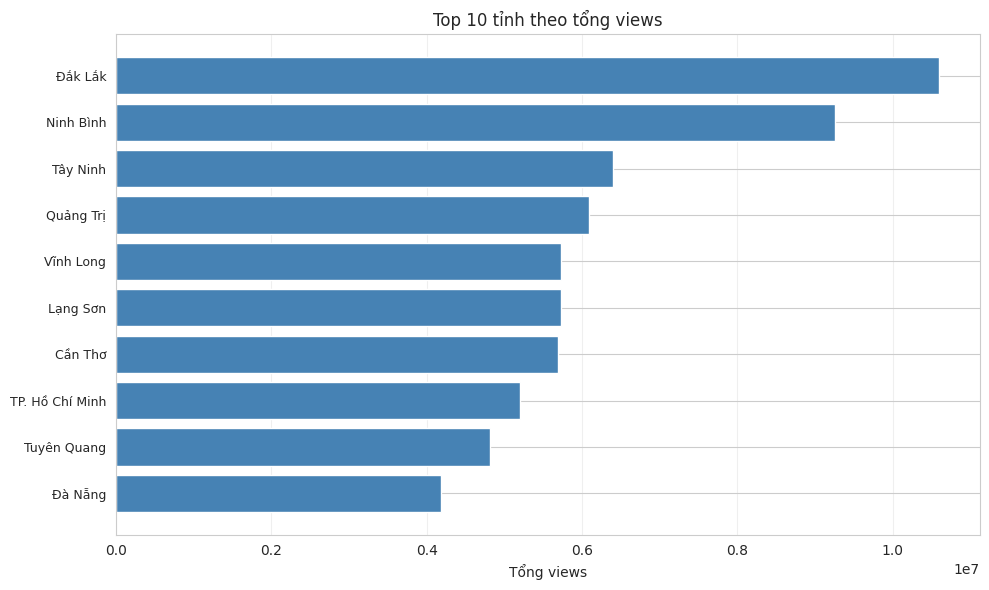

In [41]:
# Tổng hợp theo tỉnh
agg_province = (df.groupby('province')[['views', 'likes', 'comments']]
                  .sum()
                  .sort_values('views', ascending=False)
                  .reset_index())
print("📌 Tổng hợp theo tỉnh (sorted by views):")
print(agg_province.head(20).to_string(index=False))

# Top 10 tỉnh theo views
fig, ax = plt.subplots(figsize=(10, 6))
top_province = agg_province.head(10)
ax.barh(range(len(top_province)), top_province['views'], color='steelblue')
ax.set_yticks(range(len(top_province)))
ax.set_yticklabels(top_province['province'], fontsize=9)
ax.set_xlabel('Tổng views')
ax.set_title('Top 10 tỉnh theo tổng views')
ax.invert_yaxis()
ax.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

📌 Tổng hợp theo vùng:
                                         views   likes  comments
region                                                          
BẮC TRUNG BỘ VÀ DUYÊN HẢI MIỀN TRUNG  26512597  230964     13621
ĐỒNG BẰNG SÔNG CỬU LONG               24441898  220281     12896
TRUNG DU VÀ MIỀN NÚI PHÍA BẮC         16241012  190389      9575
ĐỒNG BẰNG SÔNG HỒNG                   16019425  160461     14635
ĐÔNG NAM BỘ                           11866378  125639      7998
TÂY NGUYÊN                             7606117   54790      1420


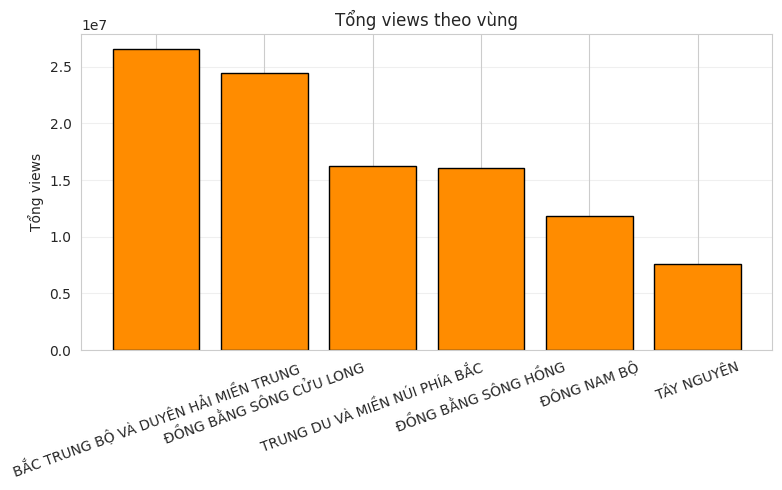

In [42]:
# Phân bổ lượt xem theo vùng
agg_region = (df.groupby('region')[['views', 'likes', 'comments']]
                .sum()
                .sort_values('views', ascending=False))
print("📌 Tổng hợp theo vùng:")
print(agg_region)

fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(agg_region.index, agg_region['views'], color='darkorange', edgecolor='black')
ax.set_ylabel('Tổng views')
ax.set_title('Tổng views theo vùng')
ax.tick_params(axis='x', rotation=20)
ax.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

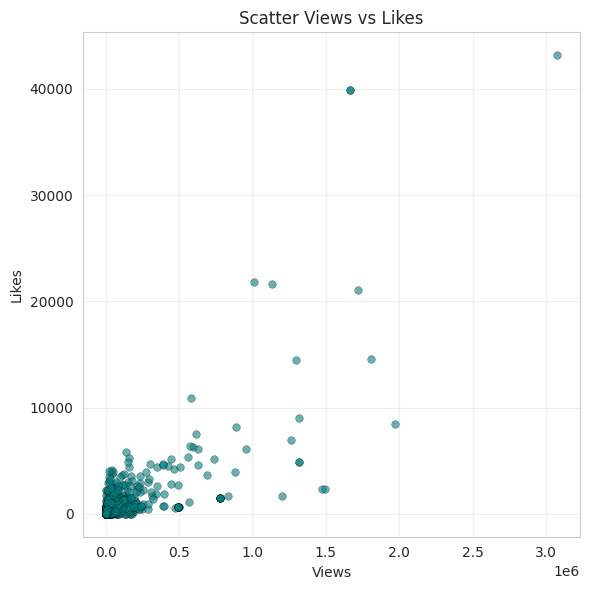

📈 Ma trận tương quan:
           views  likes  comments
views     1.000  0.775     0.678
likes     0.775  1.000     0.815
comments  0.678  0.815     1.000


In [43]:
# Tương quan lượt xem - lượt thích - bình luận
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(df['views'], df['likes'], alpha=0.6, s=30, color='teal', edgecolor='k', linewidth=0.3)
ax.set_xlabel('Views')
ax.set_ylabel('Likes')
ax.set_title('Scatter Views vs Likes')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

corr = df[['views','likes','comments']].corr()
print("📈 Ma trận tương quan:\n", corr.round(3))

In [44]:
# Lưu bảng tổng hợp theo tỉnh để dùng ngoài notebook
agg_province.to_csv('youtube_agg_by_province.csv', index=False)
print('💾 Đã lưu youtube_agg_by_province.csv')

💾 Đã lưu youtube_agg_by_province.csv


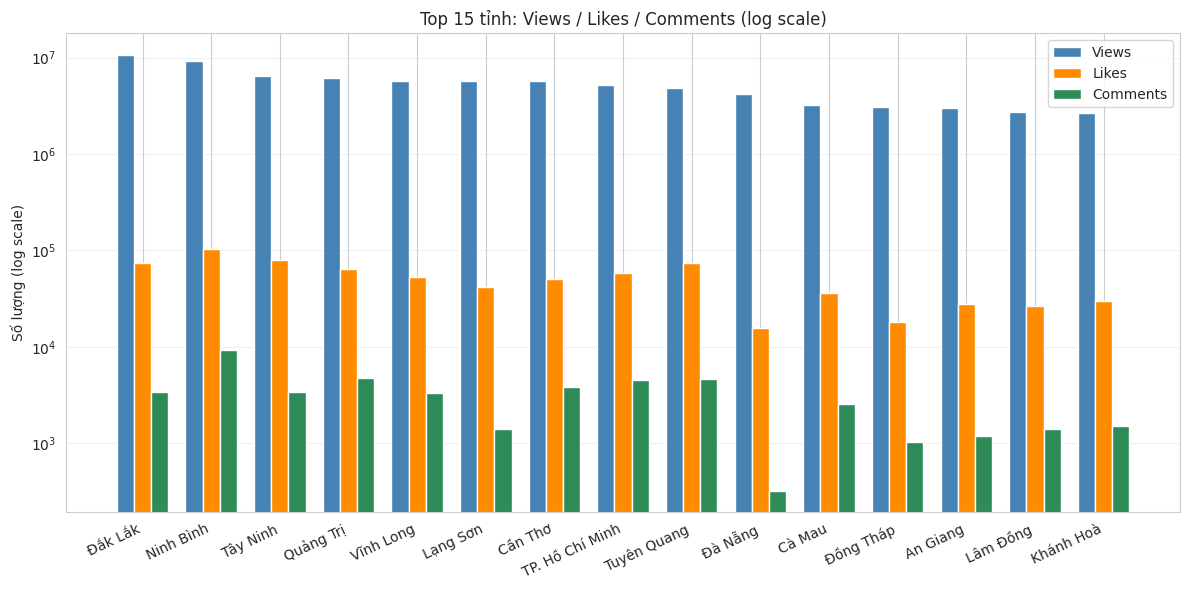

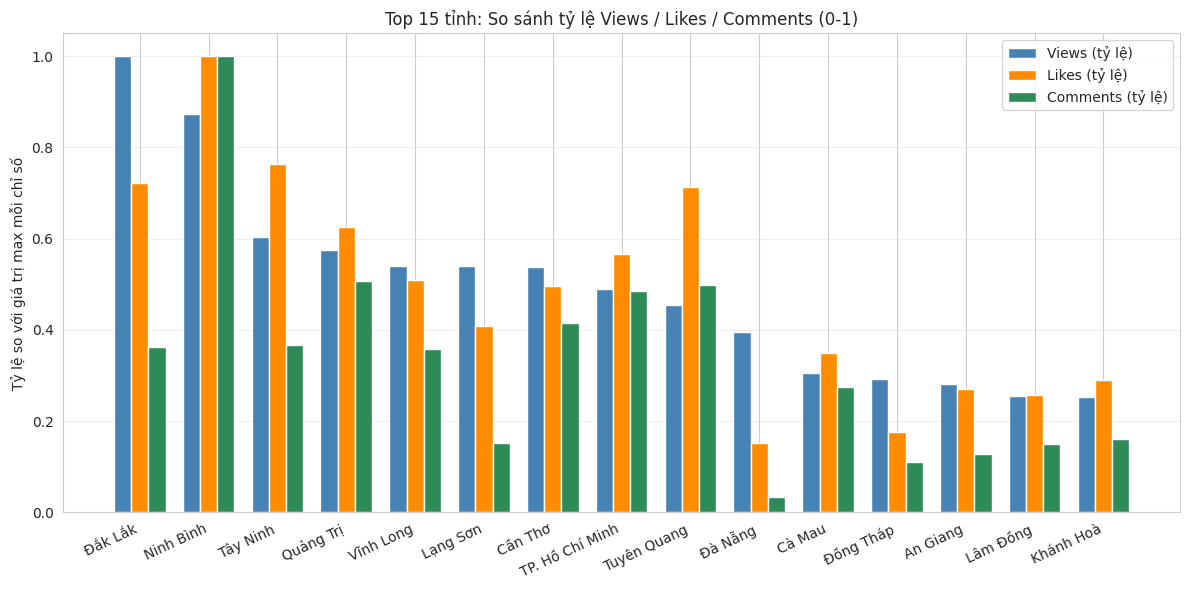

💡 Gợi ý: Biểu đồ 1 dùng thang log để thấy rõ like/comment; Biểu đồ 2 chuẩn hóa 0-1 để so sánh tỷ lệ giữa ba chỉ số.


In [45]:
# Biểu đồ gộp Views - Likes - Comments trên cùng một biểu đồ (top N tỉnh)
TOP_N = 15
metric_cols = ['views', 'likes', 'comments']
top_province_all = (
    df.groupby('province')[metric_cols]
      .sum()
      .sort_values('views', ascending=False)
      .head(TOP_N)
      .reset_index()
)

x = np.arange(len(top_province_all))
bar_width = 0.25

# --- Biểu đồ 1: Thang log để nhìn rõ like/comment (có khoảng cách lớn)
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(x - bar_width, top_province_all['views'] + 1, width=bar_width, color='steelblue', label='Views')
ax.bar(x, top_province_all['likes'] + 1, width=bar_width, color='darkorange', label='Likes')
ax.bar(x + bar_width, top_province_all['comments'] + 1, width=bar_width, color='seagreen', label='Comments')

ax.set_xticks(x)
ax.set_xticklabels(top_province_all['province'], rotation=25, ha='right')
ax.set_ylabel('Số lượng (log scale)')
ax.set_title(f'Top {TOP_N} tỉnh: Views / Likes / Comments (log scale)')
ax.set_yscale('log')
ax.grid(True, alpha=0.3, axis='y')
ax.legend()
plt.tight_layout()
plt.show()

# --- Biểu đồ 2: Chuẩn hóa về 0-1 để so sánh tỷ lệ giữa 3 chỉ số
norm_df = top_province_all.copy()
for c in metric_cols:
    max_c = norm_df[c].max() if norm_df[c].max() > 0 else 1
    norm_df[c] = norm_df[c] / max_c

fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(x - bar_width, norm_df['views'], width=bar_width, color='steelblue', label='Views (tỷ lệ)')
ax.bar(x, norm_df['likes'], width=bar_width, color='darkorange', label='Likes (tỷ lệ)')
ax.bar(x + bar_width, norm_df['comments'], width=bar_width, color='seagreen', label='Comments (tỷ lệ)')

ax.set_xticks(x)
ax.set_xticklabels(top_province_all['province'], rotation=25, ha='right')
ax.set_ylabel('Tỷ lệ so với giá trị max mỗi chỉ số')
ax.set_title(f'Top {TOP_N} tỉnh: So sánh tỷ lệ Views / Likes / Comments (0-1)')
ax.set_ylim(0, 1.05)
ax.grid(True, alpha=0.3, axis='y')
ax.legend()
plt.tight_layout()
plt.show()

print("💡 Gợi ý: Biểu đồ 1 dùng thang log để thấy rõ like/comment; Biểu đồ 2 chuẩn hóa 0-1 để so sánh tỷ lệ giữa ba chỉ số.")